**Sarthak Katyal**


Task 5


● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset: https://bit.ly/34SRn3b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dlv = pd.read_csv('deliveries.csv')
dlv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [3]:
mat = pd.read_csv('matches.csv')
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
print("Shape of Deliveries",dlv.shape)
print("Shape of Matches",mat.shape)  

Shape of Deliveries (82713, 21)
Shape of Matches (756, 18)


In [5]:
mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
dlv.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    78577
dismissal_kind      78577
fielder             79735
dtype: int64

In [7]:
season_data=mat[['id','season','winner']]

cd=dlv.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [8]:
print("Total no of matches:",len(dlv['match_id'].unique()))
print("total no of runs:",dlv['total_runs'].sum())
print("total no of batsman runs:",dlv['batsman_runs'].sum())
print("total no of extra runs:",dlv['extra_runs'].sum())
print("total no of balls:",len(dlv['ball']))
print("total no of bye runs:",dlv['bye_runs'].sum())
print("total no of wide runs:",dlv['wide_runs'].sum())
print("total no of legbye runs:",dlv['legbye_runs'].sum())
print("total no of no ball runs:",dlv['noball_runs'].sum())
print("total no of penalty runs:",dlv['penalty_runs'].sum())
print("total no of superovers:",len(dlv[dlv.is_super_over==1].match_id.unique()))
print("Average runs per match:",(dlv['total_runs'].sum())/(len(dlv['match_id'].unique())))
print("Average runs per ball:",(dlv['total_runs'].sum())/(len(dlv['ball'])))
print("Average extra runs per match:",(dlv['extra_runs'].sum())/(len(dlv['match_id'].unique())))

Total no of matches: 350
total no of runs: 106147.0
total no of batsman runs: 100178.0
total no of extra runs: 5969.0
total no of balls: 82713
total no of bye runs: 468.0
total no of wide runs: 3220.0
total no of legbye runs: 1881.0
total no of no ball runs: 395.0
total no of penalty runs: 5.0
total no of superovers: 3
Average runs per match: 303.27714285714285
Average runs per ball: 1.283317011836108
Average extra runs per match: 17.054285714285715


The team with the most number of wins per season

In [9]:
tps = mat.groupby('season')['winner'].value_counts()
tps

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [10]:
year = 2008
wps = pd.DataFrame(columns=['year','team','wins'])
for items in tps.iteritems():
  if items[0][0]==year:
    print(items)
    win_series = pd.DataFrame({
        'year':[items[0][0]],
        'team':[items[0][1]],
        'wins':[items[1]]
    })
    wps = wps.append(win_series)
    year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [11]:
wps

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


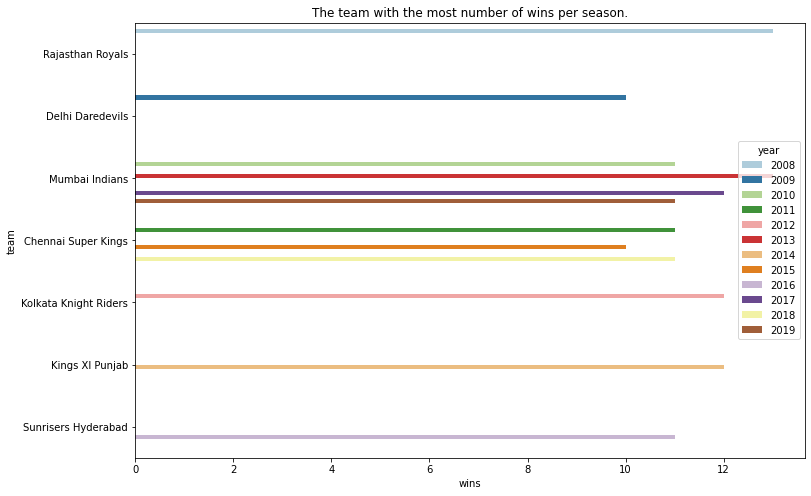

In [12]:
plt.figure(figsize=(12,8))
plt.title('The team with the most number of wins per season.')
sns.barplot('wins', 'team', hue='year', data=wps, palette='Paired')

City that hosted maximum number of matches

In [13]:
mat['city'].value_counts().head(10)

Mumbai        101
Kolkata        77
Delhi          74
Bangalore      66
Hyderabad      64
Chennai        57
Jaipur         47
Chandigarh     46
Pune           38
Durban         15
Name: city, dtype: int64

Mumbai  hosted maximum number of matches


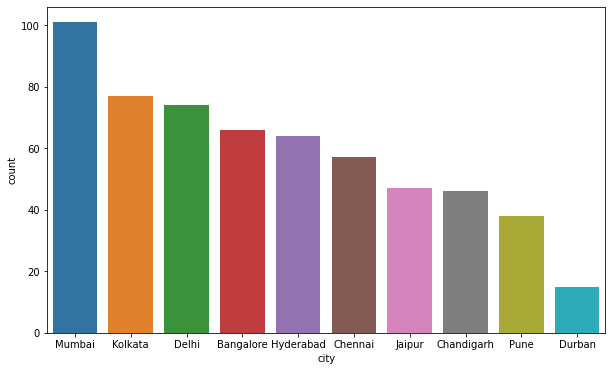

In [14]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=mat.city,order = mat.city.value_counts()[:10].index)
print('Mumbai  hosted maximum number of matches')

Stadium that hosted maximum number of matches

In [15]:
mat['venue'].value_counts().head()

Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

Eden Gardens hosted maximum number of matches


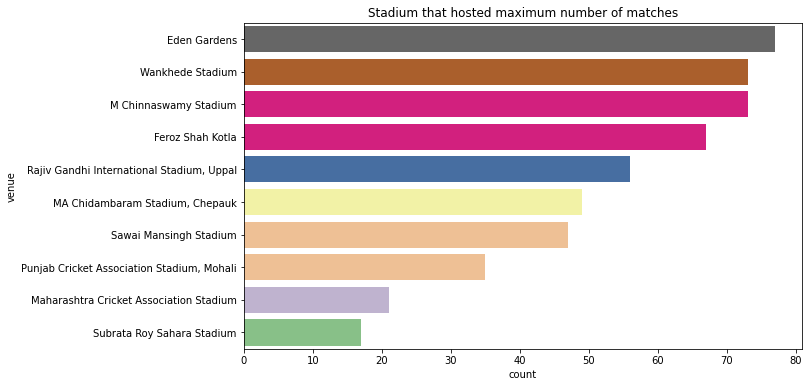

In [16]:
plt.figure(figsize=(10,6))
plt.title('Stadium that hosted maximum number of matches')
ax=sns.countplot(y=mat.venue,order = mat.venue.value_counts()[:10].index, palette="Accent_r")
print('Eden Gardens hosted maximum number of matches')

Number of toss won by teams

In [17]:
mat['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Mumbai won maximum number of tosses


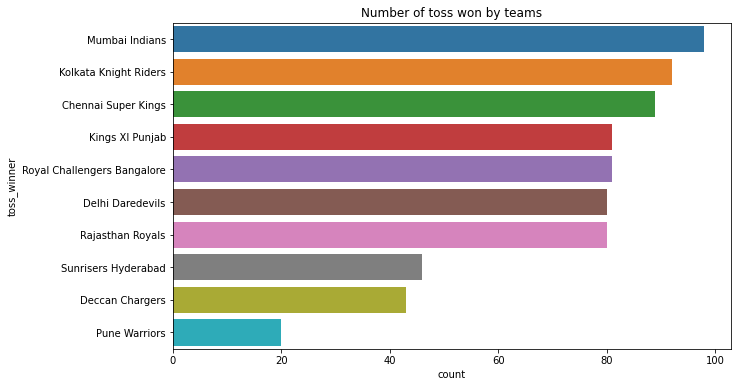

In [18]:
plt.figure(figsize=(10,6))
plt.title('Number of toss won by teams')
ax=sns.countplot(y=mat.toss_winner,order = mat.toss_winner.value_counts()[:10].index)
print('Mumbai won maximum number of tosses')

Number of Matches played in each IPL seasons

In [19]:
mat['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

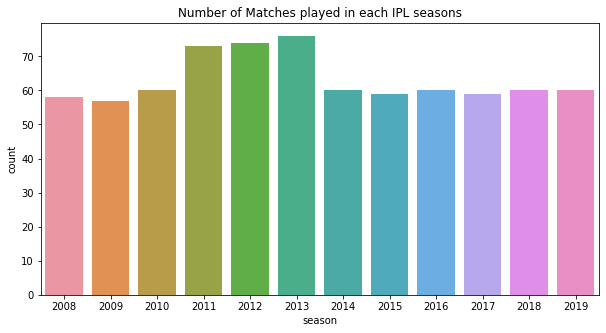

In [20]:
plt.figure(figsize=(10,5))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=mat.season)

Man of the match

In [21]:
mat['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
DP Nannes          1
MF Maharoof        1
R Bhatia           1
NV Ojha            1
Kuldeep Yadav      1
Name: player_of_match, Length: 226, dtype: int64

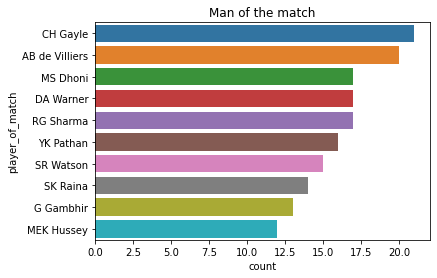

In [22]:
plt.title('Man of the match')
ax=sns.countplot(y=mat.player_of_match,order = mat.player_of_match.value_counts()[:10].index)

The probability of winning if won the toss

In [23]:
win_count = 0
for index, value in mat.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1

In [24]:
print('The number of times the team winning toss have won:',win_count)
prob = win_count/len(mat)
print('The probability of winning if won the toss: {:.2f}' .format(prob)) 

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


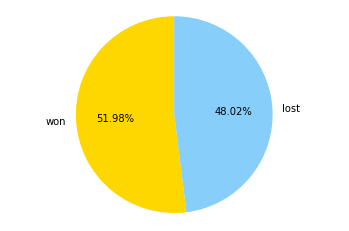

In [25]:
label = 'won','lost'
size = win_count,(len(mat)-win_count)
plt.pie(size, labels = label, colors=['gold', 'lightskyblue'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

Toss results

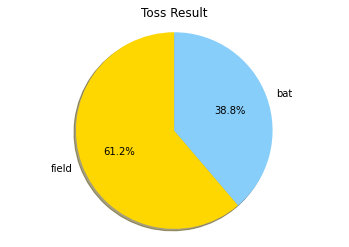

In [26]:
toss=mat.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']


plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result')
plt.axis('equal')
plt.show()

Winner of each season

In [27]:
final_match = mat.drop_duplicates(subset=['season'],keep='last')
final_match[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


No of Seasons won by teams 

In [28]:
final_match['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

Man of the Match in final match

In [29]:
final_match[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


Runs over the years

(array([12000., 13000., 14000., 15000., 16000., 17000., 18000., 19000.,
        20000., 21000.]), <a list of 10 Text major ticklabel objects>)

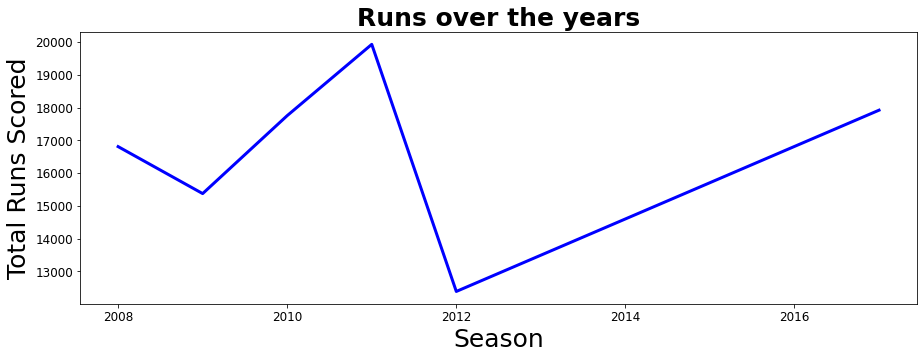

In [30]:
cd.groupby('season')['batsman_runs'].sum().plot(kind = 'line',linewidth = 3, figsize =(15,5),color = 'blue')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Bowlers with highest wickets

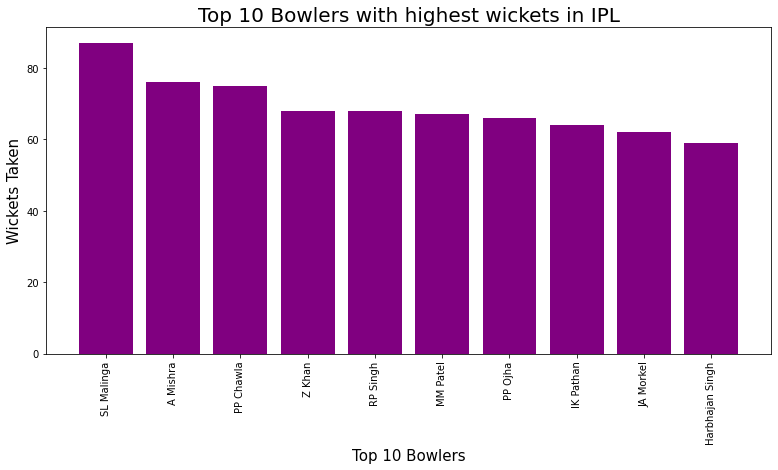

In [31]:
bowling_wickets= cd[cd['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
fig, ax = plt.subplots(figsize=(13,6))
plt.bar(top_bowlers['bowler'],top_bowlers['Wickets'],color='purple')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Bowlers',size=15)
plt.ylabel('Wickets Taken',size=15)
plt.title('Top 10 Bowlers with highest wickets in IPL',size=20)
plt.show()

Numbers of six hit by playes

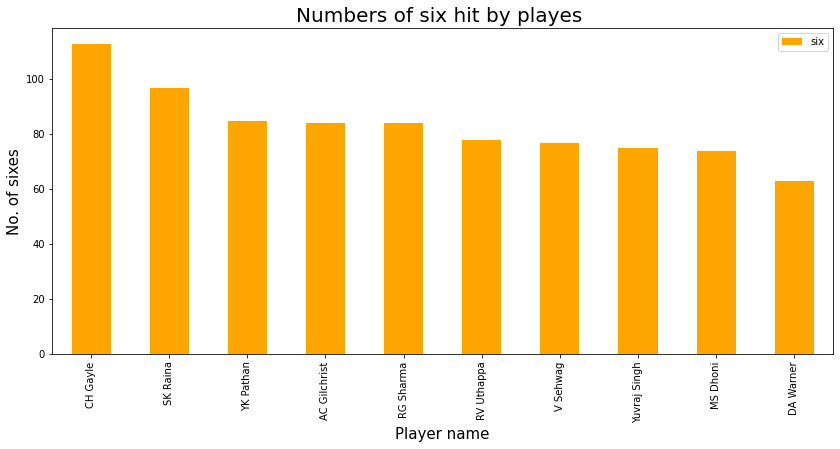

In [32]:
six_data=cd[cd['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='orange',figsize=(14,6))
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No. of sixes",fontsize=15)
plt.show()